# Total Exchange Flow

> Example for the persian gulf.

In [ ]:
from TotalExchangeFlow.tef_core import *
import pylab as plt
import xarray as xr

In [ ]:
ds = xr.open_dataset("./data/SoH_2_2011_01.nc")
tef = TEF_object(ds = ds)

**Note**: Calculation will around 3 minutes.

In [ ]:
tef.calc_flux(-tef.ds.velx3d, tef.ds.hn, tef.ds.dyc)

out1d = tef.sort_1dim(sort_by_variable=tef.ds.salt,
                      flux = tef.flux,
                      N = 100)

out2d = tef.sort_2dim(sort_by_variable=tef.ds.salt,
                      sort_by_variable2=tef.ds.temp,
                      flux = tef.flux,
                      N = 100)

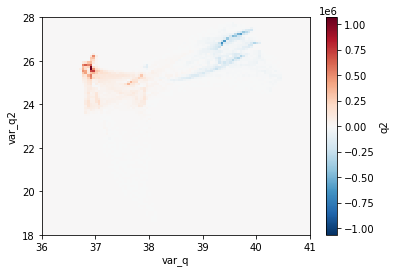

In [ ]:
out2d.q2.mean("time").plot(x = "var_q", y = "var_q2", cmap = plt.cm.RdBu_r)

Text(0, 0.5, 'Salinity $[g/kg]$')

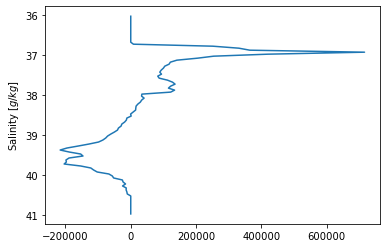

In [ ]:
f, ax = plt.subplots(1)
plt.plot(out1d.q.mean("time").values, out1d.var_q.values)
ax.invert_yaxis()
ax.set_ylabel("Salinity $[g/kg]$")